In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
customers = pd.read_csv(r"C:\Users\bhumu\Downloads\Customers.csv")
products = pd.read_csv(r"C:\Users\bhumu\Downloads\Products.csv")
transactions = pd.read_csv(r"C:\Users\bhumu\Downloads\Transactions.csv")

In [16]:
customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [17]:
products.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [18]:
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [19]:
customers.isnull().any()

CustomerID      False
CustomerName    False
Region          False
SignupDate      False
dtype: bool

In [20]:
products.isnull().any()

ProductID      False
ProductName    False
Category       False
Price          False
dtype: bool

In [21]:
transactions.isnull().any()

TransactionID      False
CustomerID         False
ProductID          False
TransactionDate    False
Quantity           False
TotalValue         False
Price              False
dtype: bool

In [22]:
products.rename(columns={'Price': 'Product_Price'}, inplace=True)

In [23]:
products.head()

,ProductID,ProductName,Category,Product_Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [24]:
transactions.rename(columns={'Price': 'Transactions_Price'}, inplace=True)

In [25]:
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Transactions_Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [26]:
df = pd.merge(customers, transactions, on='CustomerID')

In [27]:
df.head()

,CustomerID,CustomerName,Region,SignupDate,TransactionID,ProductID,TransactionDate,Quantity,TotalValue,Transactions_Price
0,C0001,Lawrence Carroll,South America,2022-07-10,T00015,P054,2024-01-19 03:12:55,2,114.60,57.30
1,C0001,Lawrence Carroll,South America,2022-07-10,T00932,P022,2024-09-17 09:01:18,3,412.62,137.54
2,C0001,Lawrence Carroll,South America,2022-07-10,T00085,P096,2024-04-08 00:01:00,2,614.94,307.47
3,C0001,Lawrence Carroll,South America,2022-07-10,T00445,P083,2024-05-07 03:11:44,2,911.44,455.72
4,C0001,Lawrence Carroll,South America,2022-07-10,T00436,P029,2024-11-02 17:04:16,3,1300.92,433.64


In [28]:
dataset =  pd.merge(df, products, on='ProductID')
dataset.head()

,CustomerID,CustomerName,Region,SignupDate,TransactionID,ProductID,TransactionDate,Quantity,TotalValue,Transactions_Price,ProductName,Category,Product_Price
0,C0001,Lawrence Carroll,South America,2022-07-10,T00015,P054,2024-01-19 03:12:55,2,114.6,57.3,SoundWave Cookbook,Books,57.3
1,C0019,Brandon Rodriguez,Europe,2023-01-12,T00423,P054,2024-11-08 10:22:51,3,171.9,57.3,SoundWave Cookbook,Books,57.3
2,C0038,Jeffrey Perkins,North America,2022-04-16,T00395,P054,2024-03-14 08:10:08,3,171.9,57.3,SoundWave Cookbook,Books,57.3
3,C0039,Angela Harris,South America,2024-10-13,T00053,P054,2024-09-30 14:42:16,3,171.9,57.3,SoundWave Cookbook,Books,57.3
4,C0047,Samantha Frank,North America,2024-03-22,T00784,P054,2024-08-23 09:06:06,3,171.9,57.3,SoundWave Cookbook,Books,57.3


In [119]:
dataset['Transactions_Price'] == dataset['Product_Price']

0      True
1      True
2      True
3      True
4      True
       ... 
995    True
996    True
997    True
998    True
999    True
Length: 1000, dtype: bool

In [42]:
dataset.describe()

,Quantity,TotalValue,Transactions_Price,Product_Price
count,1000.000000,1000.000000,1000.00000,1000.00000
mean,2.537000,689.995560,272.55407,272.55407
std,1.117981,493.144478,140.73639,140.73639
min,1.000000,16.080000,16.08000,16.08000
25%,2.000000,295.295000,147.95000,147.95000
50%,3.000000,588.880000,299.93000,299.93000
75%,4.000000,1011.660000,404.40000,404.40000
max,4.000000,1991.040000,497.76000,497.76000


In [34]:
dataset['CustomerName'].nunique()

199

In [36]:
dataset['Region'].value_counts()

South America    304
North America    244
Europe           234
Asia             218
Name: Region, dtype: int64

In [38]:
dataset['ProductName'].value_counts()

ActiveWear Smartwatch          40
SoundWave Headphones           38
BookWorld Biography            30
SoundWave Cookbook             29
ActiveWear Rug                 29
                               ..
SoundWave Bluetooth Speaker     7
BookWorld Wall Art              7
SoundWave Laptop                7
BookWorld Cookware Set          7
SoundWave Jacket                5
Name: ProductName, Length: 66, dtype: int64

In [40]:
dataset['Category'].value_counts()

Books          270
Electronics    254
Home Decor     248
Clothing       228
Name: Category, dtype: int64

#### Top Selling Products

In [60]:
total_sales = dataset.groupby(['ProductID','ProductName']).TotalValue.sum().reset_index()

In [62]:
top_10_products = total_sales.sort_values(by='TotalValue', ascending=False).head(10)

In [63]:
top_10_products

,ProductID,ProductName,TotalValue
28,P029,TechPro Headphones,19513.80
78,P079,ActiveWear Rug,17946.91
47,P048,TechPro Cookbook,17905.20
19,P020,ActiveWear Jacket,15060.92
61,P062,HomeSense Novel,14592.24
58,P059,SoundWave Jeans,13947.20
38,P039,TechPro Smartwatch,13778.88
82,P083,ActiveWear Smartwatch,13671.60
18,P019,ComfortLiving Sweater,13487.95
40,P041,ComfortLiving Smartphone,13232.12


<AxesSubplot:xlabel='ProductName', ylabel='TotalValue'>

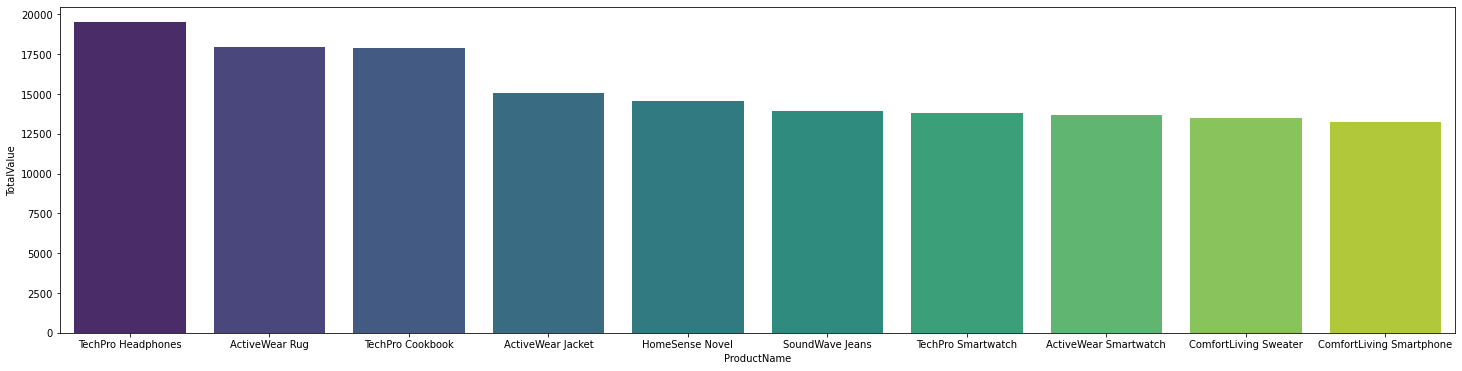

In [70]:
plt.figure(figsize=(25, 6))
sns.barplot(x='ProductName', y='TotalValue', data=top_10_products, palette='viridis')

#### Toral revenue by category

In [71]:
category_revenue = dataset.groupby('Category')['TotalValue'].sum().reset_index()

In [72]:
cat_rev = category_revenue.sort_values(by='TotalValue', ascending=False).head(10)

In [73]:
cat_rev

,Category,TotalValue
0,Books,192147.47
2,Electronics,180783.50
1,Clothing,166170.66
3,Home Decor,150893.93


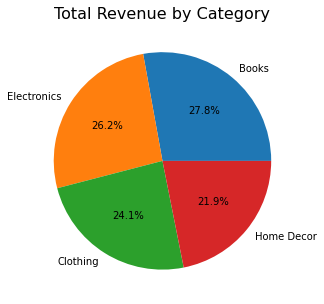

In [80]:
plt.figure(figsize=(5, 5))
plt.pie(cat_rev['TotalValue'], labels=cat_rev['Category'], autopct='%1.1f%%' )
plt.title('Total Revenue by Category', fontsize=16)
plt.show()

#### Average Transaction Value (ATV) and transaction count for each customer

In [89]:
customer_summary = dataset.groupby(['CustomerID','CustomerName']).agg(
    TotalValue=('TotalValue', 'sum'),
    TransactionCount=('TransactionID', 'count')).reset_index()

In [90]:
customer_summary['AvgTransactionValue'] = customer_summary['TotalValue'] / customer_summary['TransactionCount']

In [92]:
customer_summary

,CustomerID,CustomerName,TotalValue,TransactionCount,AvgTransactionValue
0,C0001,Lawrence Carroll,3354.52,5,670.904000
1,C0002,Elizabeth Lutz,1862.74,4,465.685000
2,C0003,Michael Rivera,2725.38,4,681.345000
3,C0004,Kathleen Rodriguez,5354.88,8,669.360000
4,C0005,Laura Weber,2034.24,3,678.080000
...,...,...,...,...,...
194,C0196,Laura Watts,4982.88,4,1245.720000
195,C0197,Christina Harvey,1928.65,3,642.883333
196,C0198,Rebecca Ray,931.83,2,465.915000
197,C0199,Andrea Jenkins,1979.28,4,494.820000


In [98]:
trans_count = customer_summary.sort_values(by='TransactionCount', ascending=False).head(10)

In [106]:
trans_count

,CustomerID,CustomerName,TotalValue,TransactionCount,AvgTransactionValue
155,C0156,William Adams,7634.45,11,694.040909
108,C0109,Abigail Jones,5487.25,11,498.840909
174,C0175,Matthew Johnson,6210.53,10,621.053000
140,C0141,Paul Parsons,10673.87,10,1067.387000
64,C0065,Gerald Hines,7663.70,10,766.370000
7,C0008,David Li,4271.61,10,427.161000
83,C0084,Belinda Garner,4441.10,9,493.455556
74,C0075,Misty Higgins,5848.97,9,649.885556
164,C0165,Juan Mcdaniel,6708.10,9,745.344444
146,C0147,Hunter Fuller,2948.44,9,327.604444


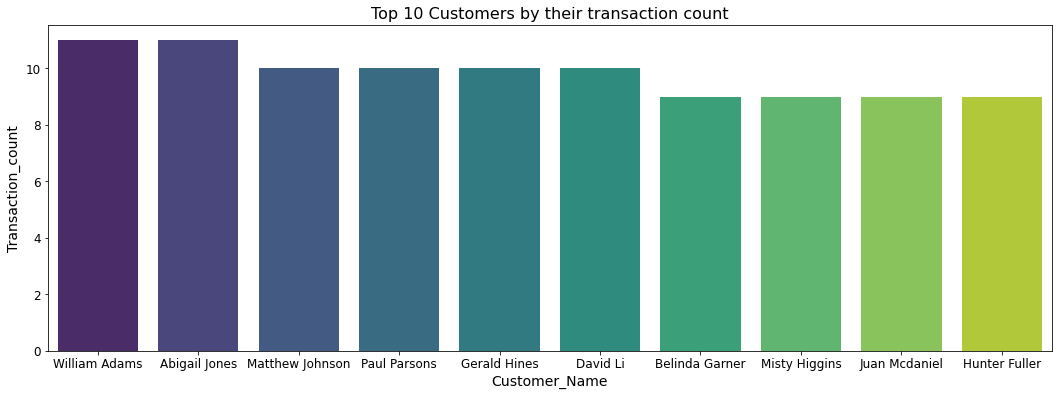

In [105]:
plt.figure(figsize=(18, 6))
sns.barplot(x='CustomerName', y='TransactionCount', data=trans_count, palette='viridis')
plt.title('Top 10 Customers by their transaction count', fontsize=16)
plt.xlabel('Customer_Name', fontsize=14)
plt.ylabel('Transaction_count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

#### Least Selling Categories by Region

In [108]:
region_category_sales = dataset.groupby(['Region', 'Category'])['TotalValue'].sum().reset_index()

In [109]:
least_selling_categories = region_category_sales.loc[
    region_category_sales.groupby('Region')['TotalValue'].idxmin()]

In [110]:
least_selling_categories

,Region,Category,TotalValue
0,Asia,Books,33119.03
5,Europe,Clothing,36335.59
11,North America,Home Decor,27746.49
13,South America,Clothing,42443.49


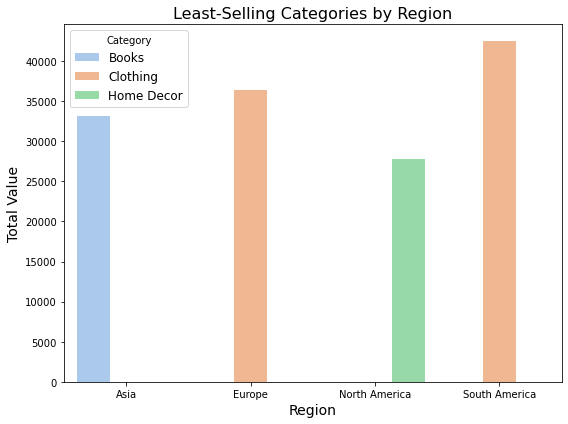

In [116]:
plt.figure(figsize=(8, 6))
sns.barplot(data=least_selling_categories, x='Region', y='TotalValue', hue='Category', palette='pastel')
plt.title('Least-Selling Categories by Region', fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Total Value', fontsize=14)
plt.legend(title='Category', fontsize=12)
plt.tight_layout()
plt.show()

#### Customer Lifetime Value (CLTV)

In [118]:
total_sales = df['TotalValue'].sum()
total_orders = df['TransactionID'].nunique()
average_purchase_value = total_sales / total_orders

# Calculate the purchase frequency (PF)
customer_frequency = dataset.groupby('CustomerName')['TransactionID'].nunique()
purchase_frequency = customer_frequency.mean()

# Assume a customer lifespan (CL) in years (this can be adjusted based on your data)
customer_lifespan = 5  # Assuming customers stay for 5 years on average

# Calculate Customer Lifetime Value (CLTV)
cltv = average_purchase_value * purchase_frequency * customer_lifespan

print(f"Average Purchase Value (APV): ${average_purchase_value:.2f}")
print(f"Purchase Frequency (PF): {purchase_frequency:.2f} purchases per customer")
print(f"Customer Lifespan (CL): {customer_lifespan} years")
print(f"Customer Lifetime Value (CLTV): ${cltv:.2f}")

Average Purchase Value (APV): $690.00
Purchase Frequency (PF): 5.03 purchases per customer
Customer Lifespan (CL): 5 years
Customer Lifetime Value (CLTV): $17336.57


#### Top 5 Customers by Orders

In [125]:
customer_order_counts = dataset.groupby(['Region', 'CustomerID','CustomerName'])['TransactionID'].count().reset_index(name='OrderCount')


customer_order_counts = customer_order_counts.sort_values(by=['Region', 'OrderCount'], ascending=[True, False])


top_5_customers_by_region = customer_order_counts.groupby('Region').head(5)


top_5_customers_by_region

,Region,CustomerID,CustomerName,OrderCount
38,Asia,C0175,Matthew Johnson,10
14,Asia,C0084,Belinda Garner,9
18,Asia,C0093,Nancy Walker,9
3,Asia,C0021,Robert Blanchard,8
6,Asia,C0028,Jennifer Pena,8
81,Europe,C0141,Paul Parsons,10
66,Europe,C0075,Misty Higgins,9
47,Europe,C0017,Jennifer King,8
51,Europe,C0041,Lindsey Deleon,7
53,Europe,C0051,Nicholas Ellis,7


#### Monthly sales trend

In [127]:
import datetime as dt

In [130]:
dataset['TransactionDate'] = pd.to_datetime(dataset['TransactionDate'], errors='coerce')

<AxesSubplot:title={'center':'Monthly Sales Trend'}, xlabel='MonthYear'>

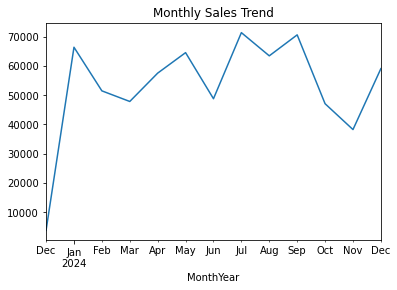

In [131]:
dataset['MonthYear'] = dataset['TransactionDate'].dt.to_period('M')
monthly_sales = dataset.groupby('MonthYear')['TotalValue'].sum()
monthly_sales.plot(title='Monthly Sales Trend')